# PROJET PYTHON

Présentation du projet

Le fichier zip joint contient les données recueillies au cours d'une compétition d'ergomètre
(machine à ramer). La compétition se déroule comme suit : chaque série comporte 4 rameurs
qui vont parcourir 2000m virtuels sur leurs machines. Le but est évidemment d'être le plus
rapide possible sur ces 2000m. Les données de chaque série sont enregistrées par les machines
et recueillies. Les courses ont été paramétrées pour que chaque parcours de 2000m soit divisé
en quatre parties de 500m, c'est-à-dire que les statistiques données par les ergomètres sont
calculées et restituées tous les 500m. Chaque fichier du zip correspond à une série.

# Importation des librairies de bases 

In [3]:
import numpy as np
import pandas as pd
from pathlib import Path
import re
import os
import warnings
warnings.filterwarnings(action = 'ignore')
import matplotlib.pyplot as plt
%matplotlib inline

# Répertoire de Travail

In [5]:
# Créer une fonction pour définir le répertoire de travail

def repertoire(chemin = str):
    
    """--Docstring--
    Fonction permettant de définir un dossier
    comme répertoire de travail et de lister tous
    les éléments présents dans le dossier
    ..
    Args:
    chemin(str): chemin d'accès au dossier
    
    returns:
    chemin(str): nouveau répertoire de travail
    dossiers(list): la liste des dossiers présents dans chemin
    fichiers(list): la liste des fichiers ordinaires présents dans chemin
    """
    
    # Importation des modules necéssaires
    from pathlib import Path
    import os
    
    # répertoire actuel de travail
    repertoire_actuel = Path.cwd()

    # chemin d'accès à mon dossier
    chemin = Path(chemin).resolve()

    # Vérification de l'existence du chemin 
    if not chemin.exists() or not chemin.is_dir():
        try:
            chemin.mkdir(parents=True, exist_ok=True)
        
        except Exception as e:
            return (f"Erreur rencontrée: {e}")
    
    # définir <chemin> comme répertoire de travail actuel 
    if repertoire_actuel != chemin:
        os.chdir(chemin)
        
    # liste des dossiers présents dans mon nouveau répertoire
    dossiers = [dossier.name for dossier in chemin.iterdir() if dossier.is_dir()]
    
    # liste des fichiers présents dans mon nouveau répertoire
    fichiers = [fichier.name for fichier in chemin.iterdir() if fichier.is_file()]

    # Retourner les éléments
    print(f"Répertoire de travail actuel: {chemin.as_posix()}\n")
    print(f"Liste des dossiers: {dossiers if len(dossiers) != 0 else 'Aucun dossier!'}\n")
    print(f"Liste des fichiers: {fichiers if len(fichiers) != 0 else 'Aucun fichier!'}\n")

    return (chemin, dossiers, fichiers)
    

In [6]:
# Utilisation de la fonction
repertoire(r"C:\Users\pc\Downloads\SORBONNE DATA ANALYTICS\Projet_python_SDA_2025")

Répertoire de travail actuel: C:/Users/pc/Downloads/SORBONNE DATA ANALYTICS/Projet_python_SDA_2025

Liste des dossiers: ['Données_json']

Liste des fichiers: ['figure_projet.png', 'Projet_Python-SANOGO_ATJI_WABO_BENLARBI.zip', 'Sujet de test.pdf']



(WindowsPath('C:/Users/pc/Downloads/SORBONNE DATA ANALYTICS/Projet_python_SDA_2025'),
 ['Données_json'],
 ['figure_projet.png',
  'Projet_Python-SANOGO_ATJI_WABO_BENLARBI.zip',
  'Sujet de test.pdf'])

# Q1. Extraction des données
Extraire les données des fichiers et les placer dans un tableau restituant pour chaque rameur
sa performance, à savoir son temps sur 2000m, la cadence moyenne sur 2000m, le nombre de
coups de rames sur 2000m, le temps sur chaque portion de 500m, la cadence moyenne sur
chaque portion de 500m, le nombre de coups de rame sur chaque portion de 500m. Le tableau
aura une ligne par rameur.

## Importation des données au format json

In [9]:
# Importation du module json pour charger les séries au format .json
import json

# dossier contenant les différentes series

Donnees = Path.cwd()/'Données_json' 

# Initialisation d'un dictionnaire pour stocker les séries  

Series_dic = {}

# parcourir les series .json dans mon dossier et les charger dans mon dictionnaire
# Chaque série étant représenté par son nom en clé

for serie in Donnees.iterdir():

    # nom de la série sans son extension .json
    
    name = serie.stem
    
    
    # Ouverture du fichier en mode lecture 'r' = read

    if serie.name.endswith('.json'):
        
        with open(serie, mode ='r', encoding = 'utf-8') as lecture:
            
            data = json.load(lecture)
        
            Series_dic[name] = data
  

In [10]:
# Liste des séries présentes
Series_dic.keys()

dict_keys(['Progressif', 'Série 1(0001)', 'Série 2', 'Série 3', 'Série 4', 'Série 5', 'Série 6', 'Série 7'])

## Extraction des variables concernées et création de la DataFrame finale

In [12]:
# Initialisation du dataframe Final vide

data_final = pd.DataFrame()


for serie, data in Series_dic.items():
    
    # Initialisation d'une liste vide pour stocker les informations des participants
    
    liste = []
    
    # Cette boucle sert à extraire les données de chaque participant  
    
    for participant in data['results']['participants']:
        
        Informations = {'nom_participant': participant['participant'],
                        'temps_2000m': participant['score'],
                        'cadence_2000m': participant['spm']
                        }
        
        # extraire les variables 'split' en ajoutant l'ordre du parcours
        
        for index, split in enumerate(participant['splits']):

            Informations[f'parcours{index+1}_temps'] = split['split_time']
            Informations[f'parcours{index+1}_cadence'] = split['split_stroke_rate']
            Informations[f'parcours{index+1}_rame'] = split['split_stroke_count']
    
        # Ajout de chaque ligne de données (données participants) à liste 
        
        liste.append(Informations)
    
    # Création du DataFrame correspondant à la serie
    
    serie = pd.DataFrame(liste)
    
    serie['coup_rame_2000m'] = (serie['parcours1_rame'] + 
                                serie['parcours2_rame'] +
                                serie['parcours3_rame'] +
                                serie['parcours4_rame'])

    # Ajout des séries à Data_final
    
    data_final = pd.concat([data_final,serie], axis = 0, ignore_index = True)

pd.set_option('display.max_columns', None)

In [13]:
data_final

,nom_participant,temps_2000m,cadence_2000m,parcours1_temps,parcours1_cadence,parcours1_rame,parcours2_temps,parcours2_cadence,parcours2_rame,parcours3_temps,parcours3_cadence,parcours3_rame,parcours4_temps,parcours4_cadence,parcours4_rame,coup_rame_2000m
0,Maxime,6:33.4,28,1016,26,44,1020,25,43,976,29,47,921,34,52,186
1,Célestin,7:01.8,28,1031,27,46,1069,25,44,1073,28,50,1044,34,59,199
2,Julien,7:47.0,26,1164,25,48,1205,24,49,1152,28,54,1148,31,59,210
3,Neve,8:12.4,27,1235,26,54,1272,25,52,1228,28,58,1188,33,65,229
4,Eric,7:57.3,27,1194,28,56,1212,26,53,1212,27,54,1155,29,56,219
5,Edouard,8:03.7,30,1148,31,59,1255,29,60,1253,29,61,1181,31,62,242
6,Baptiste,8:21.1,24,1186,27,53,1254,24,50,1307,23,49,1265,27,56,208
7,Loïs,8:24.1,30,1191,31,61,1302,29,62,1294,30,65,1254,32,66,254
8,Usama,7:54.8,27,1128,28,53,1223,26,53,1231,25,52,1167,29,56,214
9,Noé,8:05.8,34,1157,35,68,1236,33,67,1246,34,71,1219,36,74,280


## Mise en forme des variables temps 
    convertir les temps de parcours en minutes

In [15]:
# liste des variables temps

varlist = ['temps_2000m', 'parcours1_temps', 'parcours2_temps',
           'parcours3_temps', 'parcours4_temps'
          ]
varlist

['temps_2000m',
 'parcours1_temps',
 'parcours2_temps',
 'parcours3_temps',
 'parcours4_temps']

### Créer une fonction qui convertit les variables temps en minutes
    Uniquement pour les variables temps au format string  "7:56.3" = '%M:%S.%f'

In [17]:

def conversion(x, arrondi = 2):
    
    # Importation du module datetime 
    
    from datetime import datetime

    try:
        x = str(x)
        z = datetime.strptime(x , '%M:%S.%f')
        
        minutes = z.minute + (z.second + z.microsecond*1e-6)/60
    
    except ValueError:
        
        return (f"format de temps non valide! {x} n'est pas au format: '%M:%S.%f'")

    return (round(minutes,arrondi))

### Transformation des colonnes temps en minutes 

In [19]:
# Convertir les variables temps en minutes

for var in varlist:
    
    # Pour Les types 'float' ou 'integer' exemple: 1106
    
    if data_final[var].dtype in ('float64','int64'):
        
        data_final[var] = round((data_final[var] * 0.1) / 60, 2)
        
    # Pour les types 'string' exemple: 7:57.3
    else:
        data_final[var] = data_final[var].apply(conversion)

## Résultats de la question Q1

In [21]:
data_final

,nom_participant,temps_2000m,cadence_2000m,parcours1_temps,parcours1_cadence,parcours1_rame,parcours2_temps,parcours2_cadence,parcours2_rame,parcours3_temps,parcours3_cadence,parcours3_rame,parcours4_temps,parcours4_cadence,parcours4_rame,coup_rame_2000m
0,Maxime,6.56,28,1.69,26,44,1.70,25,43,1.63,29,47,1.54,34,52,186
1,Célestin,7.03,28,1.72,27,46,1.78,25,44,1.79,28,50,1.74,34,59,199
2,Julien,7.78,26,1.94,25,48,2.01,24,49,1.92,28,54,1.91,31,59,210
3,Neve,8.21,27,2.06,26,54,2.12,25,52,2.05,28,58,1.98,33,65,229
4,Eric,7.96,27,1.99,28,56,2.02,26,53,2.02,27,54,1.92,29,56,219
5,Edouard,8.06,30,1.91,31,59,2.09,29,60,2.09,29,61,1.97,31,62,242
6,Baptiste,8.35,24,1.98,27,53,2.09,24,50,2.18,23,49,2.11,27,56,208
7,Loïs,8.40,30,1.98,31,61,2.17,29,62,2.16,30,65,2.09,32,66,254
8,Usama,7.91,27,1.88,28,53,2.04,26,53,2.05,25,52,1.94,29,56,214
9,Noé,8.10,34,1.93,35,68,2.06,33,67,2.08,34,71,2.03,36,74,280


# Q2. Calcul des vitesses et longueurs moyennes 
En déduire pour chaque participant la vitesse moyenne en km/h sur 2000m, la vitesse moyenne
en km/h sur chaque portion de 500m, la longueur moyenne parcourue par coup de rame sur
2000m, la longueur moyenne parcourue par coup de rame sur chaque portion de 500m.


## la vitesse moyenne en km/h sur 2000m

In [24]:
# Notation scientifique '6e-2' = 6 x 10^(-2)

data_final['Vitesse(km/h)_2000'] = round((2000 / data_final['temps_2000m'])*(6e-2), 2) 

## la vitesse moyenne en km/h sur chaque portion de 500m

In [26]:
list_temps = ['parcours1_temps', 'parcours2_temps', 'parcours3_temps', 'parcours4_temps']

for index, var in enumerate(list_temps):

    data_final[f'V(km/h)_parcours{index+1}'] = round((500 / data_final[var])*(6e-2), 2)

## la longueur moyenne parcourue par coup de rame sur 2000m

In [28]:
data_final['longmoyenne_2000'] = round(2000 / data_final['coup_rame_2000m'], 2)

## la longueur moyenne parcourue par coup de rame sur chaque portion de 500m

In [30]:
list_rame = ['parcours1_rame','parcours2_rame','parcours3_rame','parcours4_rame']

for index, var in enumerate(list_rame):
    
    data_final[f'longmoyenne_parcours{index+1}'] = round(500 / data_final[var], 2)

## Résultats de la question Q2
    Ici nous affichons les variables calculées au niveau de la question Q2

In [32]:
condition = data_final.loc[:,'temps_2000m':'parcours4_rame'].columns.tolist()
data_final.drop(columns = condition, axis = 1)

,nom_participant,coup_rame_2000m,Vitesse(km/h)_2000,V(km/h)_parcours1,V(km/h)_parcours2,V(km/h)_parcours3,V(km/h)_parcours4,longmoyenne_2000,longmoyenne_parcours1,longmoyenne_parcours2,longmoyenne_parcours3,longmoyenne_parcours4
0,Maxime,186,18.29,17.75,17.65,18.40,19.48,10.75,11.36,11.63,10.64,9.62
1,Célestin,199,17.07,17.44,16.85,16.76,17.24,10.05,10.87,11.36,10.00,8.47
2,Julien,210,15.42,15.46,14.93,15.62,15.71,9.52,10.42,10.20,9.26,8.47
3,Neve,229,14.62,14.56,14.15,14.63,15.15,8.73,9.26,9.62,8.62,7.69
4,Eric,219,15.08,15.08,14.85,14.85,15.62,9.13,8.93,9.43,9.26,8.93
5,Edouard,242,14.89,15.71,14.35,14.35,15.23,8.26,8.47,8.33,8.20,8.06
6,Baptiste,208,14.37,15.15,14.35,13.76,14.22,9.62,9.43,10.00,10.20,8.93
7,Loïs,254,14.29,15.15,13.82,13.89,14.35,7.87,8.20,8.06,7.69,7.58
8,Usama,214,15.17,15.96,14.71,14.63,15.46,9.35,9.43,9.43,9.62,8.93
9,Noé,280,14.81,15.54,14.56,14.42,14.78,7.14,7.35,7.46,7.04,6.76


# Q3. Visualisation Graphs
Placer sur un graphique admettant en abscisse la cadence moyenne sur 500 et en ordonnée la
longueur moyenne du coup sur 500 tous les points correspondant aux enregistrements sur
500m. A quelle cadence la vitesse maximale est-elle atteinte ? A quel point cela correspond-il
sur le graphique ?

In [34]:
data_final

,nom_participant,temps_2000m,cadence_2000m,parcours1_temps,parcours1_cadence,parcours1_rame,parcours2_temps,parcours2_cadence,parcours2_rame,parcours3_temps,parcours3_cadence,parcours3_rame,parcours4_temps,parcours4_cadence,parcours4_rame,coup_rame_2000m,Vitesse(km/h)_2000,V(km/h)_parcours1,V(km/h)_parcours2,V(km/h)_parcours3,V(km/h)_parcours4,longmoyenne_2000,longmoyenne_parcours1,longmoyenne_parcours2,longmoyenne_parcours3,longmoyenne_parcours4
0,Maxime,6.56,28,1.69,26,44,1.70,25,43,1.63,29,47,1.54,34,52,186,18.29,17.75,17.65,18.40,19.48,10.75,11.36,11.63,10.64,9.62
1,Célestin,7.03,28,1.72,27,46,1.78,25,44,1.79,28,50,1.74,34,59,199,17.07,17.44,16.85,16.76,17.24,10.05,10.87,11.36,10.00,8.47
2,Julien,7.78,26,1.94,25,48,2.01,24,49,1.92,28,54,1.91,31,59,210,15.42,15.46,14.93,15.62,15.71,9.52,10.42,10.20,9.26,8.47
3,Neve,8.21,27,2.06,26,54,2.12,25,52,2.05,28,58,1.98,33,65,229,14.62,14.56,14.15,14.63,15.15,8.73,9.26,9.62,8.62,7.69
4,Eric,7.96,27,1.99,28,56,2.02,26,53,2.02,27,54,1.92,29,56,219,15.08,15.08,14.85,14.85,15.62,9.13,8.93,9.43,9.26,8.93
5,Edouard,8.06,30,1.91,31,59,2.09,29,60,2.09,29,61,1.97,31,62,242,14.89,15.71,14.35,14.35,15.23,8.26,8.47,8.33,8.20,8.06
6,Baptiste,8.35,24,1.98,27,53,2.09,24,50,2.18,23,49,2.11,27,56,208,14.37,15.15,14.35,13.76,14.22,9.62,9.43,10.00,10.20,8.93
7,Loïs,8.40,30,1.98,31,61,2.17,29,62,2.16,30,65,2.09,32,66,254,14.29,15.15,13.82,13.89,14.35,7.87,8.20,8.06,7.69,7.58
8,Usama,7.91,27,1.88,28,53,2.04,26,53,2.05,25,52,1.94,29,56,214,15.17,15.96,14.71,14.63,15.46,9.35,9.43,9.43,9.62,8.93
9,Noé,8.10,34,1.93,35,68,2.06,33,67,2.08,34,71,2.03,36,74,280,14.81,15.54,14.56,14.42,14.78,7.14,7.35,7.46,7.04,6.76


## Vitesse maximale atteinte

In [36]:
# vitesse max
vmax = np.max(data_final.loc[:,'V(km/h)_parcours1':'V(km/h)_parcours4'])

# Trouver les indexes lignes 'vmax_idxrow' et colonnes 'vmax_idxcolumn' de 'v_max'
indexes = np.where(data_final == vmax)
vmax_idxrow, vmax_idxcolumn = indexes[0][0], indexes[1][0]

# Trouver la cadence_moyenne et la distance de coup de rame correspondant à v_max
split = data_final.columns[vmax_idxcolumn][-1] # extraire le chiffre du split

stroke_rate_max = data_final.loc[vmax_idxrow, f'parcours{split}_cadence']

stroke_dist_max = data_final.loc[vmax_idxrow, f'longmoyenne_parcours{split}']

nom = data_final.loc[vmax_idxrow, 'nom_participant']

nom, stroke_rate_max, stroke_dist_max

('Maxime', 34, 9.62)

## Tracé du Graph

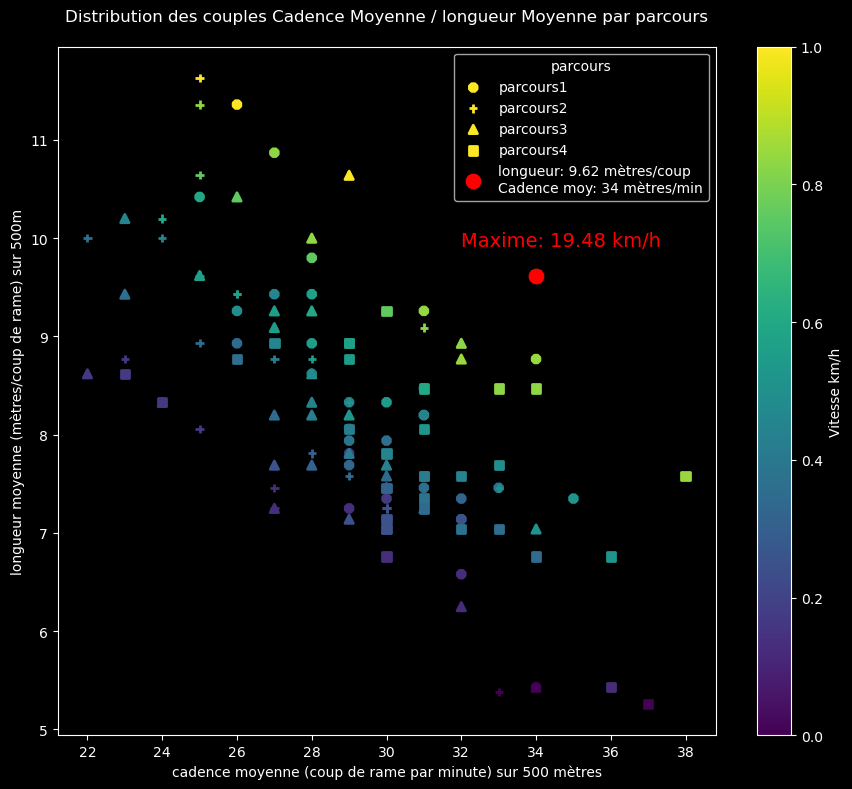

In [38]:
# Tracé de la figure
plt.style.use('dark_background')
plt.figure(figsize = (9,8))

# Nous avons 4 parcours (splits de 500 mètres)
plt.scatter(data_final['parcours1_cadence'], data_final['longmoyenne_parcours1'],
            c = data_final['Vitesse(km/h)_2000'], cmap = 'viridis', lw = 2, marker = '8', label = 'parcours1')
plt.scatter(data_final['parcours2_cadence'], data_final['longmoyenne_parcours2'],
            c = data_final['Vitesse(km/h)_2000'], cmap = 'viridis', lw = 2, marker = '+', label = 'parcours2')
plt.scatter(data_final['parcours3_cadence'], data_final['longmoyenne_parcours3'],
            c = data_final['Vitesse(km/h)_2000'], cmap = 'viridis', lw = 2, marker = '^', label = 'parcours3')
plt.scatter(data_final['parcours4_cadence'], data_final['longmoyenne_parcours4'],
            c = data_final['Vitesse(km/h)_2000'], cmap = 'viridis', lw = 2, marker = 's', label = 'parcours4')

# On trace le point en rouge pour vmax
plt.scatter(stroke_rate_max, stroke_dist_max, color='red', lw = 3, s=70, 
            label=f"longueur: {stroke_dist_max} mètres/coup \nCadence moy: {stroke_rate_max} mètres/min", )

# Afficher le nom du participant ayant la plus grande vitesse 
plt.text(stroke_rate_max - 2, stroke_dist_max + 0.3, f'{nom}: {vmax} km/h', color='red', fontsize=14)

# titres et légendes
plt.title("Distribution des couples Cadence Moyenne / longueur Moyenne par parcours\n")
plt.ylabel('longueur moyenne (mètres/coup de rame) sur 500m')
plt.xlabel('cadence moyenne (coup de rame par minute) sur 500 mètres')
plt.legend(title = 'parcours')

# Affichage de la figure
plt.colorbar(label = 'Vitesse km/h')
plt.tight_layout()
plt.savefig('figure_projet.png')
plt.show()

# Partie Innovation

In [40]:
# liste des noms masculins

nom_masculin = ['Maxime', 'Célestin', 'Julien', 'Eric', 'Edouard', 'Baptiste',
                'Usama', 'Noé', 'Emilien', 'Tom', 'Ivan', 'Merle', 'Amaury',
                'Thomas', 'Jerome', 'Corentin', 'Hervé']

# création de la variable "sexe" avec la condition np.where
"""
on vérifie si le nom se trouve dans la liste des hommes
et on attribue le sexe 'homme' sinon 'femme'
"""
data_final['sexe'] = np.where(data_final['nom_participant'].isin(nom_masculin), 'homme',
                          'femme')
data_final['sexe'] = data_final['sexe'].astype('category')

In [41]:
data_final

,nom_participant,temps_2000m,cadence_2000m,parcours1_temps,parcours1_cadence,parcours1_rame,parcours2_temps,parcours2_cadence,parcours2_rame,parcours3_temps,parcours3_cadence,parcours3_rame,parcours4_temps,parcours4_cadence,parcours4_rame,coup_rame_2000m,Vitesse(km/h)_2000,V(km/h)_parcours1,V(km/h)_parcours2,V(km/h)_parcours3,V(km/h)_parcours4,longmoyenne_2000,longmoyenne_parcours1,longmoyenne_parcours2,longmoyenne_parcours3,longmoyenne_parcours4,sexe
0,Maxime,6.56,28,1.69,26,44,1.70,25,43,1.63,29,47,1.54,34,52,186,18.29,17.75,17.65,18.40,19.48,10.75,11.36,11.63,10.64,9.62,homme
1,Célestin,7.03,28,1.72,27,46,1.78,25,44,1.79,28,50,1.74,34,59,199,17.07,17.44,16.85,16.76,17.24,10.05,10.87,11.36,10.00,8.47,homme
2,Julien,7.78,26,1.94,25,48,2.01,24,49,1.92,28,54,1.91,31,59,210,15.42,15.46,14.93,15.62,15.71,9.52,10.42,10.20,9.26,8.47,homme
3,Neve,8.21,27,2.06,26,54,2.12,25,52,2.05,28,58,1.98,33,65,229,14.62,14.56,14.15,14.63,15.15,8.73,9.26,9.62,8.62,7.69,femme
4,Eric,7.96,27,1.99,28,56,2.02,26,53,2.02,27,54,1.92,29,56,219,15.08,15.08,14.85,14.85,15.62,9.13,8.93,9.43,9.26,8.93,homme
5,Edouard,8.06,30,1.91,31,59,2.09,29,60,2.09,29,61,1.97,31,62,242,14.89,15.71,14.35,14.35,15.23,8.26,8.47,8.33,8.20,8.06,homme
6,Baptiste,8.35,24,1.98,27,53,2.09,24,50,2.18,23,49,2.11,27,56,208,14.37,15.15,14.35,13.76,14.22,9.62,9.43,10.00,10.20,8.93,homme
7,Loïs,8.40,30,1.98,31,61,2.17,29,62,2.16,30,65,2.09,32,66,254,14.29,15.15,13.82,13.89,14.35,7.87,8.20,8.06,7.69,7.58,femme
8,Usama,7.91,27,1.88,28,53,2.04,26,53,2.05,25,52,1.94,29,56,214,15.17,15.96,14.71,14.63,15.46,9.35,9.43,9.43,9.62,8.93,homme
9,Noé,8.10,34,1.93,35,68,2.06,33,67,2.08,34,71,2.03,36,74,280,14.81,15.54,14.56,14.42,14.78,7.14,7.35,7.46,7.04,6.76,homme


In [42]:
# Statistiques sur les vitesses de groupes par split
list_vitesse = data_final.columns.tolist()[17:21]
stats = ['median', 'min', 'max']
tbl_vitesse = data_final.groupby('sexe').agg({var: stats for var in list_vitesse})
tbl_vitesse

V(km/h)_parcours1               V(km/h)_parcours2                \
                 median    min    max            median    min    max   
sexe                                                                    
femme             14.02  12.50  15.23             13.39  11.95  14.93   
homme             15.46  11.11  17.86             14.56  10.79  17.65   

      V(km/h)_parcours3               V(km/h)_parcours4                
                 median    min    max            median    min    max  
sexe                                                                   
femme             13.51  11.58  14.93             13.89  12.00  15.31  
homme             14.42  11.03  18.40             15.23  11.54  19.48

In [43]:
# Statistiques sur les temps de groupes réalisés par split
regex = r"^parcours[1-4]{1}[_]temps$"
liste_temps = [var for var in data_final.columns.tolist() if re.match(regex,var)]
tbl_time = data_final.groupby('sexe').agg({var: stats for var in list_temps})
tbl_time

parcours1_temps            parcours2_temps             parcours3_temps  \
               median   min  max          median   min   max          median   
sexe                                                                           
femme            2.14  1.97  2.4            2.24  2.01  2.51            2.22   
homme            1.94  1.68  2.7            2.06  1.70  2.78            2.08   

                  parcours4_temps             
        min   max          median   min  max  
sexe                                          
femme  2.01  2.59            2.16  1.96  2.5  
homme  1.63  2.72            1.97  1.54  2.6

In [44]:
# Cette partie a pour but de créer deux lignes dans les tableaux
# croisés pour faire apparaitre les noms des participants correspondant
# aux statistiques observées

data_final.sort_values(by = 'sexe', inplace = True)

for tbl in (tbl_vitesse, tbl_time):
    
    stats_femme = tbl.iloc[0,:].values.tolist()
    stats_homme = tbl.iloc[1,:].values.tolist()
    dico = {"femme": stats_femme, "homme": stats_homme}
    nom_femme, nom_homme = [], []
    

    for sex, stats in dico.items():
        for val in stats:
            nom = data_final[(data_final.sexe == sex) & (data_final.isin([val]).any(axis=1))]
            if sex == "femme":
                nom_femme.append(nom.iloc[0,0])
            else:
                nom_homme.append(nom.iloc[0,0])
            
    tbl.loc[len(tbl)] = nom_femme
    tbl.loc[len(tbl)] = nom_homme
    tbl.rename(index = {tbl.index[-1]: 'nom_homme',
                        tbl.index[-2]: 'nom_femme'},
               inplace=True)
    tbl.reset_index(inplace = True)
    tbl.iloc[[1, 2]] = tbl.iloc[[2, 1]].values
    tbl.set_index('sexe', inplace = True)

In [45]:
# Compter les participants par sexe
data_final['sexe'].value_counts()

sexe
homme    17
femme    15
Name: count, dtype: int64

In [46]:
tbl_vitesse.transpose()

sexe                      femme  nom_femme  homme nom_homme
V(km/h)_parcours1 median  14.02     Eloïse  15.46     Usama
                  min      12.5    Valérie  11.11    Amaury
                  max     15.23        Léa  17.86    Thomas
V(km/h)_parcours2 median  13.39  Dominique  14.56       Noé
                  min     11.95    Valérie  10.79    Amaury
                  max     14.93      Alice  17.65    Maxime
V(km/h)_parcours3 median  13.51     Orlane  14.42   Emilien
                  min     11.58       Anaë  11.03    Amaury
                  max     14.93      Alice   18.4    Maxime
V(km/h)_parcours4 median  13.89     Eloïse  15.23   Edouard
                  min      12.0    Valérie  11.54    Amaury
                  max     15.31      Alice  19.48    Maxime

In [47]:
tbl_time.transpose()

sexe                   femme  nom_femme homme nom_homme
parcours1_temps median  2.14     Eloïse  1.94     Usama
                min     1.97        Léa  1.68    Thomas
                max      2.4    Valérie   2.7    Amaury
parcours2_temps median  2.24  Dominique  2.06       Noé
                min     2.01      Alice   1.7    Maxime
                max     2.51    Valérie  2.78    Amaury
parcours3_temps median  2.22     Orlane  2.08   Emilien
                min     2.01      Alice  1.63    Maxime
                max     2.59       Anaë  2.72    Amaury
parcours4_temps median  2.16     Eloïse  1.97   Edouard
                min     1.96      Alice  1.54    Maxime
                max      2.5    Valérie   2.6    Amaury

##### Analyse synthétique des 2 tableaux
Les deux tableaux tbl_vitesse et tbl_time montrent les performances vitesses et temps
sur l'ensemble des splits pour chaque sexe et les noms associés aux performances.
Sur l'ensemble des données, on constate que les hommes réalisent en moyenne et 
même individuellement de meilleures performances que les femmes. On trouve chez les femmes,
respectivement chez les hommes "Alice" et "Maxime" qui réalisent les meilleures stats et
conservent leurs pôles positions (1er rang) sur les plits 2,3 et 4. A l'opposé, dans le même
ordre, on retrouve "Valérie" et "Amaury" qui réalisent les pires performances en termes de 
temps et vitesse.

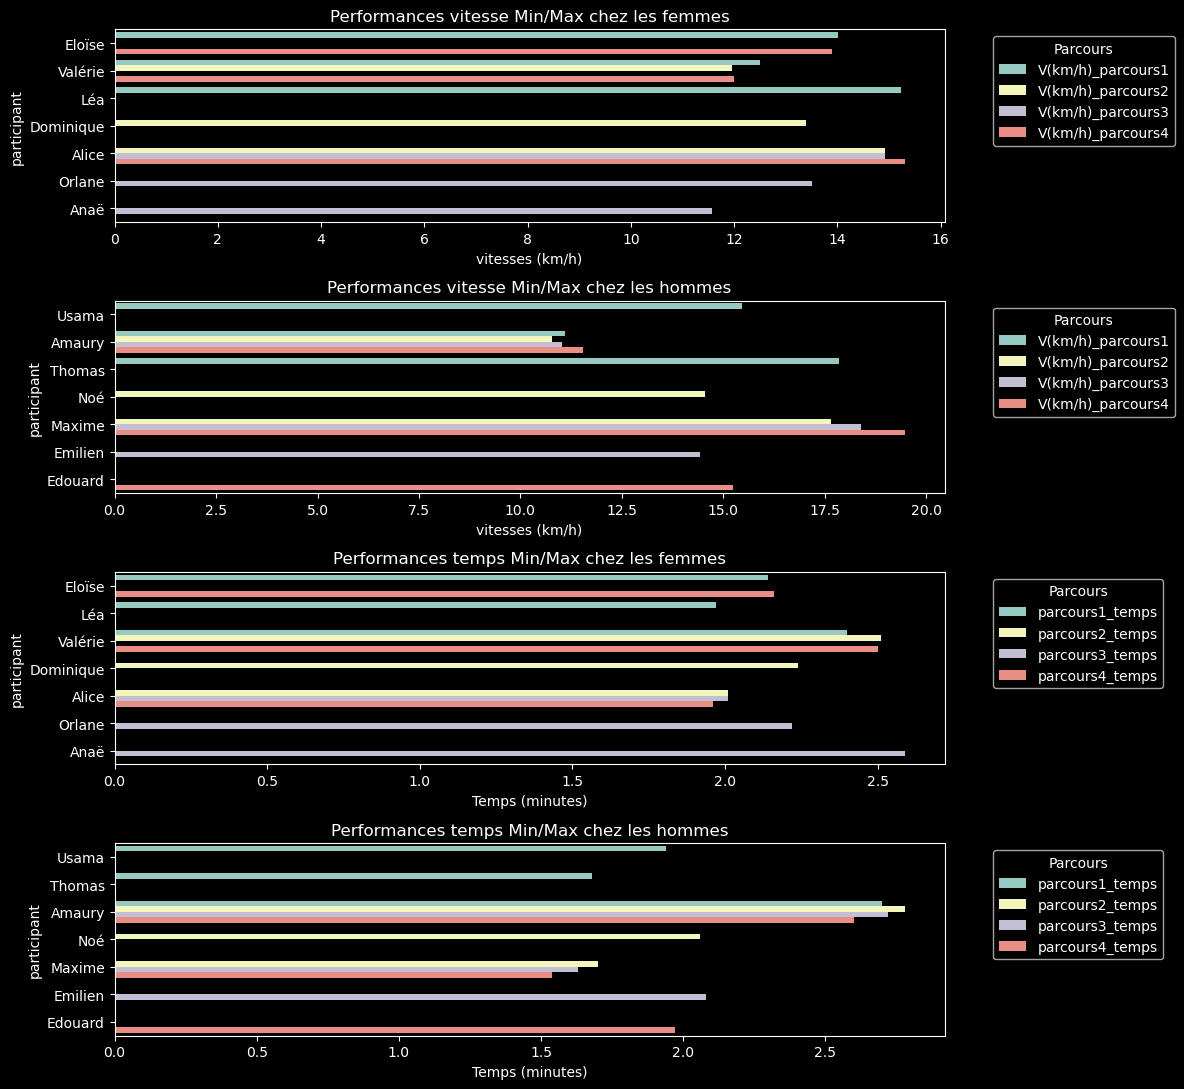

In [49]:
# importation de seaborn
import seaborn as sns

# Définition des tables pour les graphiques
tab1 = tbl_vitesse.transpose().reset_index()
tab2 = tbl_time.transpose().reset_index()

# Thème de fonds
plt.style.use('dark_background')

# Définir 4 subplots et la taille de la figure
fig, ax = plt.subplots(4,1, figsize = (12,11))

# Barplot horizontale performance vitesse min/max chez les femmes
sns.barplot(data = tab1, hue="level_0", x="femme", y="nom_femme", orient = 'h',
            ax = ax[0])
ax[0].set_title('Performances vitesse Min/Max chez les femmes')
ax[0].set_xlabel('vitesses (km/h)')
ax[0].set_ylabel('participant')
ax[0].legend(title="Parcours", bbox_to_anchor=(1.05, 1), loc='upper left')

# Barplot horizontal performance vitesse min/max chez les hommes
sns.barplot(data = tab1, hue="level_0", x="homme", y="nom_homme", orient = 'h',
            ax = ax[1])
ax[1].set_title('Performances vitesse Min/Max chez les hommes')
ax[1].set_xlabel('vitesses (km/h)')
ax[1].set_ylabel('participant')
ax[1].legend(title="Parcours", bbox_to_anchor=(1.05, 1), loc='upper left')

# Barplot horizontal performance temps min/max chez les femmes
sns.barplot(data = tab2, hue="level_0", x="femme", y="nom_femme", orient = 'h',
            ax = ax[2])
ax[2].set_title('Performances temps Min/Max chez les femmes')
ax[2].set_xlabel('Temps (minutes)')
ax[2].set_ylabel('participant')
ax[2].legend(title="Parcours", bbox_to_anchor=(1.05, 1), loc='upper left')

# Barplot horizontal performance temps min/max chez les hommes
sns.barplot(data = tab2, hue="level_0", x="homme", y="nom_homme", orient = 'h',
            ax = ax[3])
ax[3].set_title('Performances temps Min/Max chez les hommes')
ax[3].set_xlabel('Temps (minutes)')
ax[3].set_ylabel('participant')
ax[3].legend(title="Parcours", bbox_to_anchor=(1.05, 1), loc='upper left')

# Affichage
plt.tight_layout()
plt.show()